# Instalar dependências
pipenv install scikit-learn scipy pandas matplotlib statsmodels fastapi uvicorn pydantic pingouin seaborn ipykernel

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import pingouin as pg

### Carga dos dados

In [4]:
df_pontuacao = pd.read_csv('./dataset/pontuacao_teste.csv')

In [5]:
# Checar estrutura d o Dataset
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [6]:
# Visualizar topo do DF
df_pontuacao.head(10)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
5,5.0,100
6,5.5,115
7,6.1,120
8,6.5,130
9,7.2,145


In [7]:
# Visualizar final do DF
df_pontuacao.tail(10)

,horas_estudo,pontuacao_teste
91,44.9,750
92,45.1,755
93,45.3,760
94,45.5,765
95,45.7,770
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


# EDA

In [8]:
# Medidas estatísticas das variáveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


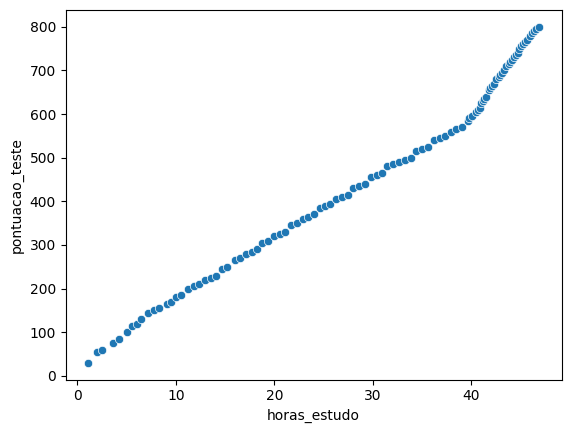

In [9]:
# Plot de Dispersão
# X é horas de estudo e Y é a pontuação
sns.scatterplot(x='horas_estudo', y='pontuacao_teste', data=df_pontuacao)
plt.show()


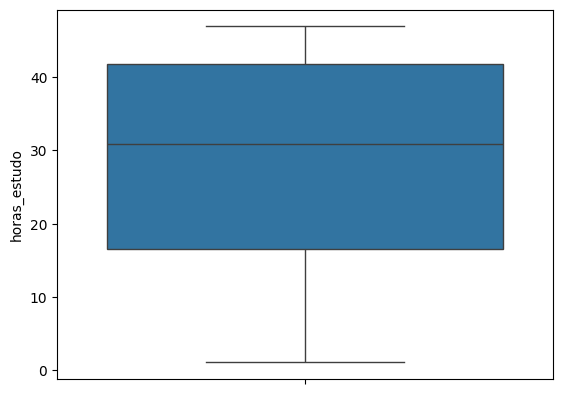

In [10]:
# Verificar se temos outliers
# Plot de Boxplot
sns.boxplot(data=df_pontuacao, y='horas_estudo')
plt.show()

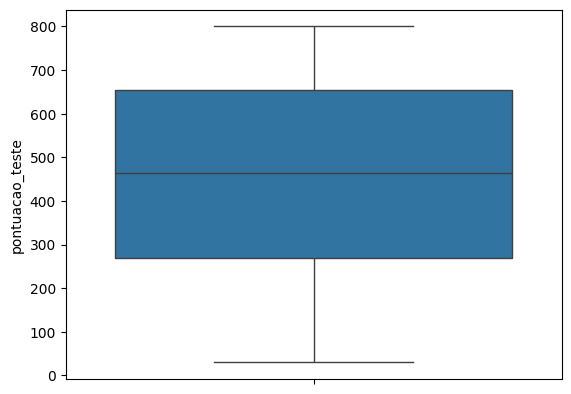

In [11]:
# Verificar se temos outliers
# Plot de Boxplot
sns.boxplot(data=df_pontuacao, y='pontuacao_teste')
plt.show()

<Axes: >

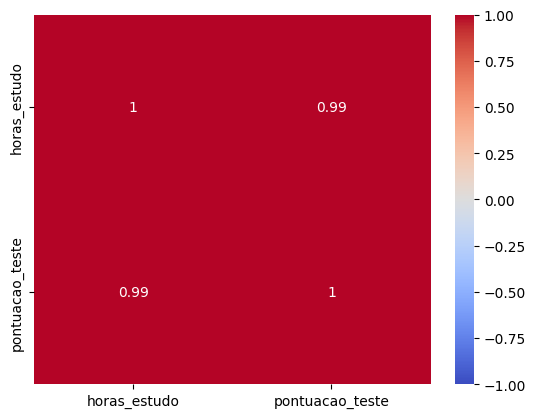

In [12]:
# Verificar a correlação dos dados - Pearson
sns.heatmap(df_pontuacao.corr('pearson'), cmap='coolwarm', annot=True, vmin=-1, vmax=1)

<Axes: >

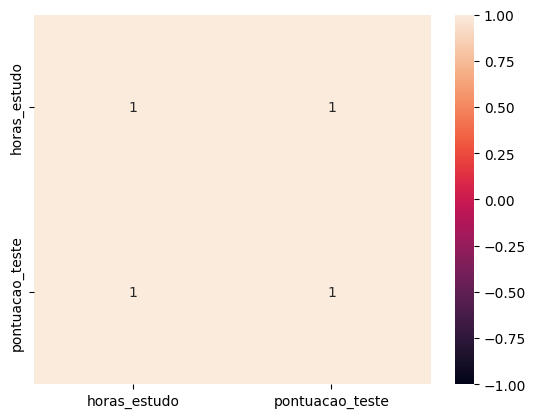

In [13]:
# Verificar a correlação dos dados - Spearman
sns.heatmap(df_pontuacao.corr('spearman'), annot=True, vmin=-1, vmax=1)

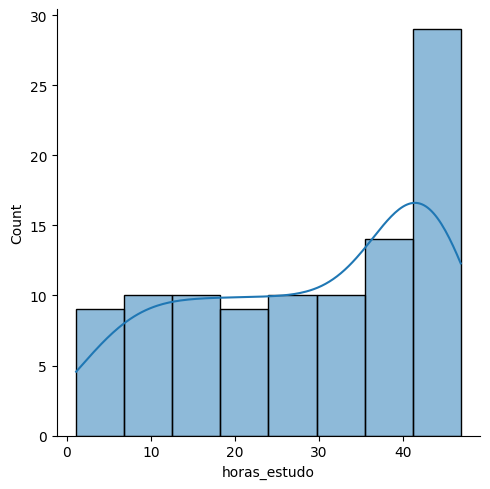

In [14]:
# Histograma das variáveis
sns.displot(data=df_pontuacao, x='horas_estudo', kde=True)

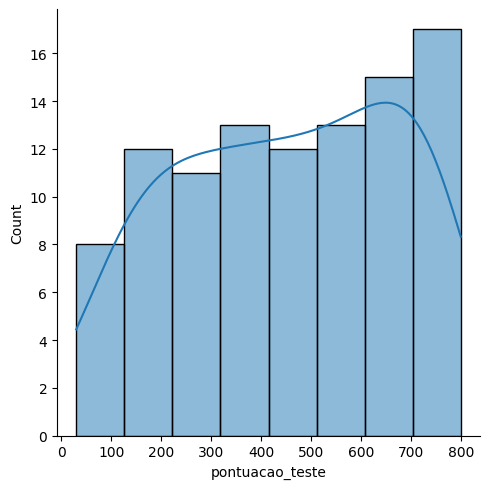

In [15]:
# Histograma das variáveis
sns.displot(data=df_pontuacao, x='pontuacao_teste', kde=True)

# Treinar Modelo

In [16]:
# Dividir dataset entre treino e teste
# X é a variável independente
X = df_pontuacao['horas_estudo'].values.reshape(-1, 1)
# Y é a variável dependente
y = df_pontuacao['pontuacao_teste'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [17]:
# Instanciar o modelo de Regressão Linear
modelo = LinearRegression()

# Treinar o modelo
modelo.fit(X_train, y_train)

# Prever os valores
y_pred = modelo.predict(X_test)

In [18]:
# Imprimir a equação da reta
# y = aX + b
print("A equação da reta é: y = {:4f}x + {:4f}".format(modelo.coef_[0][0], modelo.intercept_[0]))

A equação da reta é: y = 15.642619x + 8.476601


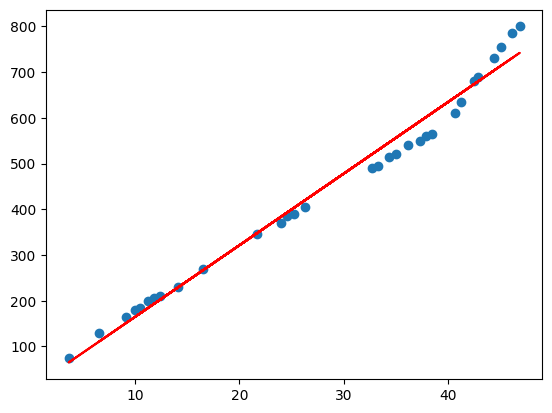

In [19]:
# Plotar a reta de regressão
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()
# Análise de Resíduos
# Calcular resíduos
residuos = y_test - y_pred
# Calcular os resíduos padronizados (standardization)

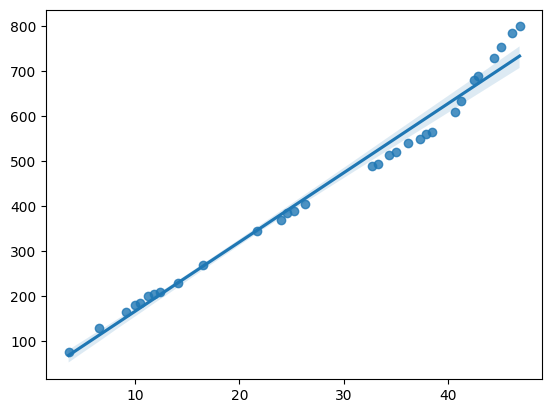

In [20]:
# Plot do seaborn para visualizar a reta de regressão
sns.regplot(x=X_test, y=y_test)
plt.show()

# Validar o modelo - Métricas

In [21]:
# Prever os valores
y_pred = modelo.predict(X_test)

In [22]:
# Calcular métrica $-squared ou Coeficiente de Determinação
# R2 representa a proporção na variação da variável dependente que é previsível a partir da variável independente
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test, y_pred)

0.9828400452912442

In [23]:
# Calcular o erro médio absoluto (MAE)
mean_absolute_error(y_test, y_pred)

22.957470277134615

In [24]:
# Calcular métrica MSE (Mean Squared Error)
mean_squared_error(y_test, y_pred)

766.9972992416427

In [25]:
# Calcular métrica RMSE (Root Mean Squared Error)
np.sqrt(mean_squared_error(y_test, y_pred))

27.69471608884342

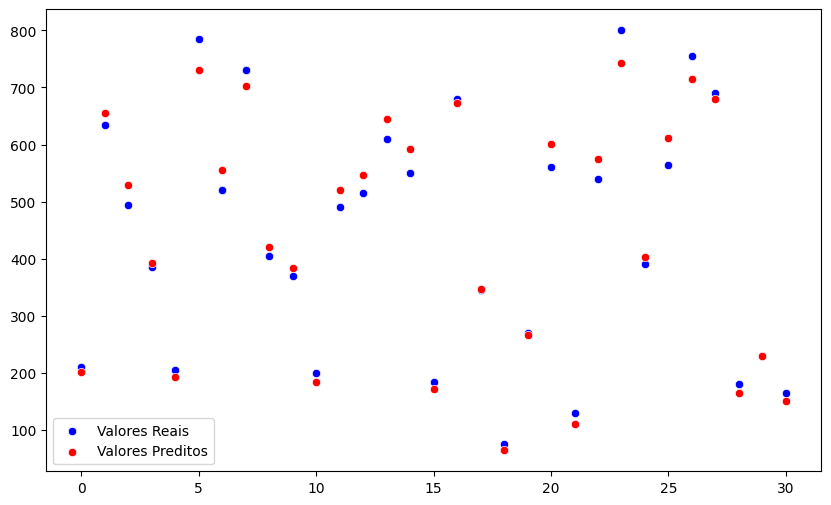

In [26]:
# Análise Gráfica
x_axis = range(len(y_test))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valores Reais')

sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores Preditos')

plt.legend()
plt.show()

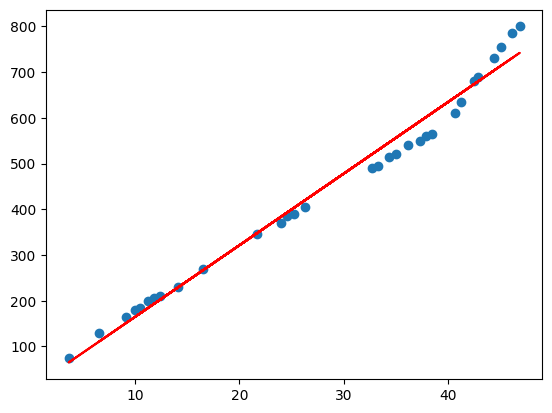

In [27]:
# Plotar a reta de regressão
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()

# Análise de Resíduos

In [28]:
# Calcular resíduos
residuos = y_test - y_pred

In [29]:
# Calcular os resíduos padronizados (standardization)
from scipy.stats import zscore
residuos_padronizados = zscore(residuos)

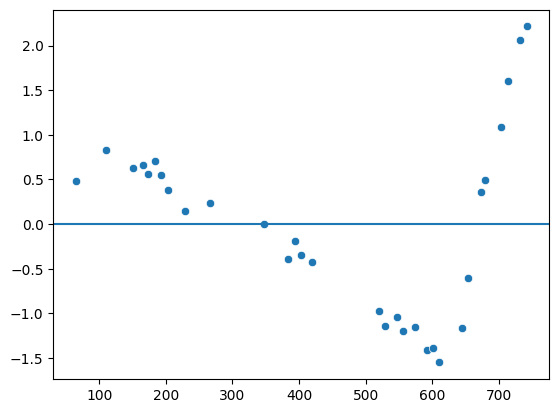

In [30]:
# Verificar linearidade do modelo:
# Se os resíduos padronizados estiverem entre -2 e 2, o modelo é linear

# Verificar a homogeneidade das variâncias (Homocedasticidade)
# Valores estiverem em torno da reta, temos homocedasticidade, caso contrário, heterocedasticidade

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_padronizados.reshape(-1))
plt.axhline(y=0)

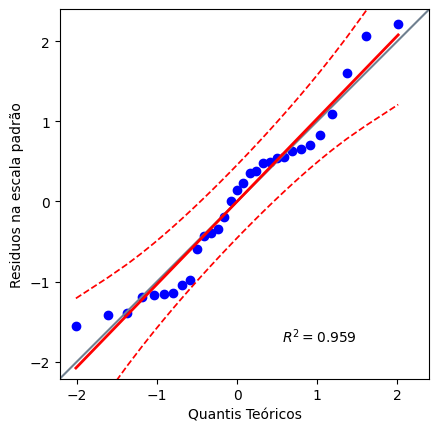

In [31]:
# Checar se os resíduos seguem uma distribuição normal
# QQ (Quantile-Quantile) Plot que avalia se os resíduos seguem uma distribuição normal
pg.qqplot(residuos_padronizados, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Residuos na escala padrão')
plt.show()

In [32]:
# Teste de Shapiro-Wilk
# H0 <- segue distribuição normal
# H1 <- não segue distribuição normal
# se o p-valor > 0.05, não rejeitamos H0, caso contrário, rejeitamos H0
stat_shapiro, p_valor_shapiro = shapiro(residuos.reshape(-1))
print("Estatística de teste: {} e P-Valor: {}".format(stat_shapiro, p_valor_shapiro))

Estatística de teste: 0.9500532226161759 e P-Valor: 0.15663817850304967


In [33]:
# Teste de Kolmogorov-Smirnov
# H0 <- segue distribuição normal
# H1 <- não segue distribuição normal
# se o p-valor > 0.05, não rejeitamos H0, caso contrário, rejeitamos H0
stat_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print("Estatística de teste: {} e P-Valor: {}".format(stat_ks, p_valor_ks))

Estatística de teste: 0.48355808450512827 e P-Valor: 3.395368995814077e-07


### Fazer predições com o modelo

In [34]:
# Se eu estudar 30.4h qual a pontuação prevista pelo modelo?
modelo.predict([[30.4], [32]])

array([[484.01220436],
       [509.04039402]])

In [35]:
# Quantas horas estudar para obter 600 pontos?
horas = (600 - modelo.intercept_[0]) / modelo.coef_[0][0]
print(horas)

37.81485802710669


# Salvar modelo para usar depois

In [36]:
import joblib
joblib.dump(modelo, "modelo_regressao_linear.pkl")

['modelo_regressao_linear.pkl']